# Tidying Surveyed Salary Data

## Normalizing Dataset Portion 1: Analyzing Salary by Industry

### Upload file:

In [2]:
import pandas as pd
import numpy as np

path_to_file = "C:\\Users\\kboostri\\OneDrive - Schrafts's 2.0 LLC\\Documents\\Salary Survey.csv"

df = pd.read_csv(path_to_file)

print(df.head())

            Timestamp How old are you? What industry do you work in?  \
0  4/24/2019 11:43:21            35-44                    Government   
1  4/24/2019 11:43:26            25-34       Environmental nonprofit   
2  4/24/2019 11:43:27            18-24               Market Research   
3  4/24/2019 11:43:27            25-34                 Biotechnology   
4  4/24/2019 11:43:29            25-34                    Healthcare   

                                  Job title What is your annual salary?  \
0          Talent Management Asst. Director                       75000   
1                       Operations Director                      65,000   
2                 Market Research Assistant                      36,330   
3                          Senior Scientist                       34600   
4  Social worker (embedded in primary care)                       55000   

  Please indicate the currency Where are you located? (City/state/country)  \
0                          USD        

### Transform it by trimming spaces and conforming salary values to numerical values. 

In [3]:
df['What industry do you work in?'] = df['What industry do you work in?'].str.strip()

df['Job title'] = df['Job title'].str.strip()

df['What is your annual salary?'] = df['What is your annual salary?'].str.replace(' ', '')

df['What is your annual salary?'] = df['What is your annual salary?'].str.replace(',', '')

df['What is your annual salary?'] = df['What is your annual salary?'].str.extract('(\d+)', expand=False)

df['NumericalSalary'] = df['What is your annual salary?'].str.isdigit()

### Parse city, state and country values, then conform state values to upper case values, two-letter values.

In [4]:
new = df["Where are you located? (City/state/country)"].str.split(",", n = 2, expand = True) 

new[0] = new[0].str.strip()

new[1] = new[1].str.strip()

for x in range(len(new)):
    if new[1][x] is not None and len(str(new[1][x])) > 2:
        new[1][x] = None

new[1] = new[1].str.upper() 

print(new.head())

                    0     1     2
0           Nashville    TN  None
1             Madison    WI  None
2           Las Vegas    NV  None
3             Cardiff    UK  None
4  Southeast Michigan  None  None


### Add City Column to Original Dataframe

In [5]:
df['City'] = new[0]

### The industries have been normalized in another CSV and imported for merging.

In [6]:
file = "C:\\Users\\kboostri\\OneDrive - Schrafts's 2.0 LLC\\Documents\\Normalized Industry.csv"

df2 = pd.read_csv(file)

print(df2.head())

             What industry do you work in?     Normalized
0  Architecture, Engineering, Construction   Construction
1                                  Biotech  Biotechnology
2                               E-Commerce     E-Commerce
3                     Facility maintenance    Maintenance
4                            Manufacturing  Manufacturing


In [7]:
merge = df.merge(df2, on = 'What industry do you work in?', how = 'left')

### Format the salary as a float so it can be calculated and then further filtered for only USD values and values over 5,000 USD (to avoid outliers). It is further sorted from most to least. 

In [8]:
USD = merge[merge['Please indicate the currency'] == 'USD'] 

USD['What is your annual salary?'] = USD['What is your annual salary?'].astype(float)

USDnum = USD[(USD['NumericalSalary'] == True) & (USD['What is your annual salary?'] > 5000)] 

print(USDnum.head())

            Timestamp How old are you? What industry do you work in?  \
0  4/24/2019 11:43:21            35-44                    Government   
1  4/24/2019 11:43:26            25-34       Environmental nonprofit   
2  4/24/2019 11:43:27            18-24               Market Research   
4  4/24/2019 11:43:29            25-34                    Healthcare   
5  4/24/2019 11:43:29            25-34        Information Management   

                                  Job title  What is your annual salary?  \
0          Talent Management Asst. Director                      75000.0   
1                       Operations Director                      65000.0   
2                 Market Research Assistant                      36330.0   
4  Social worker (embedded in primary care)                      55000.0   
5                      Associate Consultant                      45000.0   

  Please indicate the currency Where are you located? (City/state/country)  \
0                          USD  

C:\Users\kboostri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
industry_salary_avg = pd.pivot_table(USDnum, values='What is your annual salary?', index ='Normalized',
                    aggfunc=np.average, fill_value=0)

industry_salary_avg.reset_index(inplace = True)

industry_salary_avg.sort_values(by = ['What is your annual salary?'], ascending = False, inplace = True)

industry_salary_avg.columns = ['Industry', 'Average Salary (USD)']

print(industry_salary_avg)

               Industry  Average Salary (USD)
28          Electronics         210000.000000
2        Administration         188416.120000
54            Marketing         166833.333333
67  Technology/Software         162235.115854
49       Legal Services         159451.328537
..                  ...                   ...
68       Transportation          57216.666667
66      Social Services          54000.000000
75              Writing          53507.142857
71            Warehouse          52342.250000
11                 Arts          46388.571429

[76 rows x 2 columns]


### Only the top five and bottom five are assigned to new dataframes and then plotted into a bar graph for analysis of top earning and bottom earning industries by salary (USD).

In [10]:
top5 = industry_salary_avg.head(5)

bottom5 = industry_salary_avg.tail(5)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = top5.plot.bar(x = 'Industry', y = 'Average Salary (USD)', rot=0, figsize=(20,10), grid = True, legend=False, title ="Top Five Average Salary by Industry")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

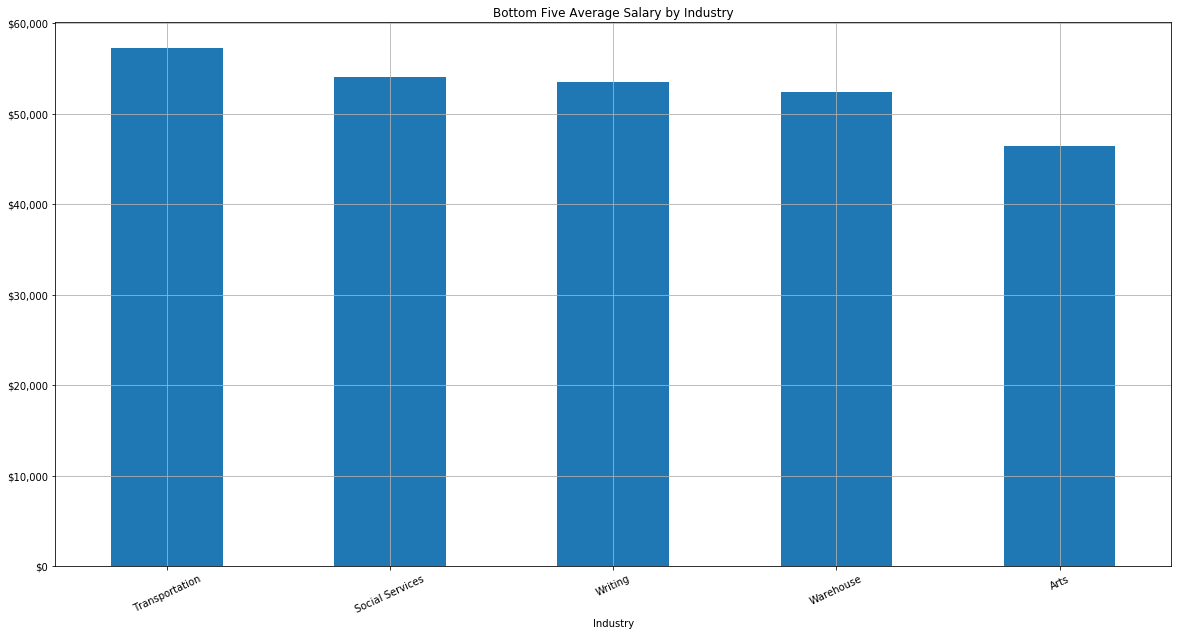

In [91]:
ax2 = bottom5.plot.bar(x = 'Industry', y = 'Average Salary (USD)', rot=0, figsize=(20,10), grid = True, legend=False, title ="Bottom Five Average Salary by Industry")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

## Normalizing Dataset Portion 2: Analyzing Salary by State

### In In[73], we noticed that the states are not quite finished being normalized because some country abbreviations have been parsed out (i.e. UK). To assure that it is mapped to only US states, a CSV of state abbreviations and their state names will be imported and merged.

In [13]:
file = "https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv"

state = pd.read_csv(file)

state.columns = ['State Name', 'State']

print(state.head())

   State Name State
0     Alabama    AL
1      Alaska    AK
2     Arizona    AZ
3    Arkansas    AR
4  California    CA


### Remove NaN values that were not properly mapped to the state file.

In [14]:
df['State'] = new[1]

merge2 = df.merge(state, on = 'State', how = 'left')

USD2 = merge2[merge2['Please indicate the currency'] == 'USD'] 

USD2['What is your annual salary?'] = USD2['What is your annual salary?'].astype(float)

USDnum2 = USD2[(USD2['NumericalSalary'] == True) & (USD2['What is your annual salary?'] > 5000) & (USD2['State Name'].notnull())] 

print(USDnum2.head())

             Timestamp How old are you? What industry do you work in?  \
0   4/24/2019 11:43:21            35-44                    Government   
1   4/24/2019 11:43:26            25-34       Environmental nonprofit   
2   4/24/2019 11:43:27            18-24               Market Research   
5   4/24/2019 11:43:29            25-34        Information Management   
19  4/24/2019 11:43:41            25-34                         media   

                           Job title  What is your annual salary?  \
0   Talent Management Asst. Director                      75000.0   
1                Operations Director                      65000.0   
2          Market Research Assistant                      36330.0   
5               Associate Consultant                      45000.0   
19          senior marketing manager                      90000.0   

   Please indicate the currency Where are you located? (City/state/country)  \
0                           USD                               Nashv

C:\Users\kboostri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
state_salary_avg = pd.pivot_table(USDnum2, values='What is your annual salary?', index ='State Name',
                    aggfunc=np.average, fill_value=0)

state_salary_avg.reset_index(inplace = True)

state_salary_avg.sort_values(by = ['What is your annual salary?'], ascending = False, inplace = True)

state_salary_avg.columns = ['State', 'Average Salary (USD)']

print(state_salary_avg.head())

         State  Average Salary (USD)
1       Alaska         190693.687500
4   California         121925.713269
32    New York         113040.330516
47  Washington         104030.028398
43       Texas         102717.255009


In [16]:
top5sal = state_salary_avg.head(5)

bottom5sal = state_salary_avg.tail(5)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

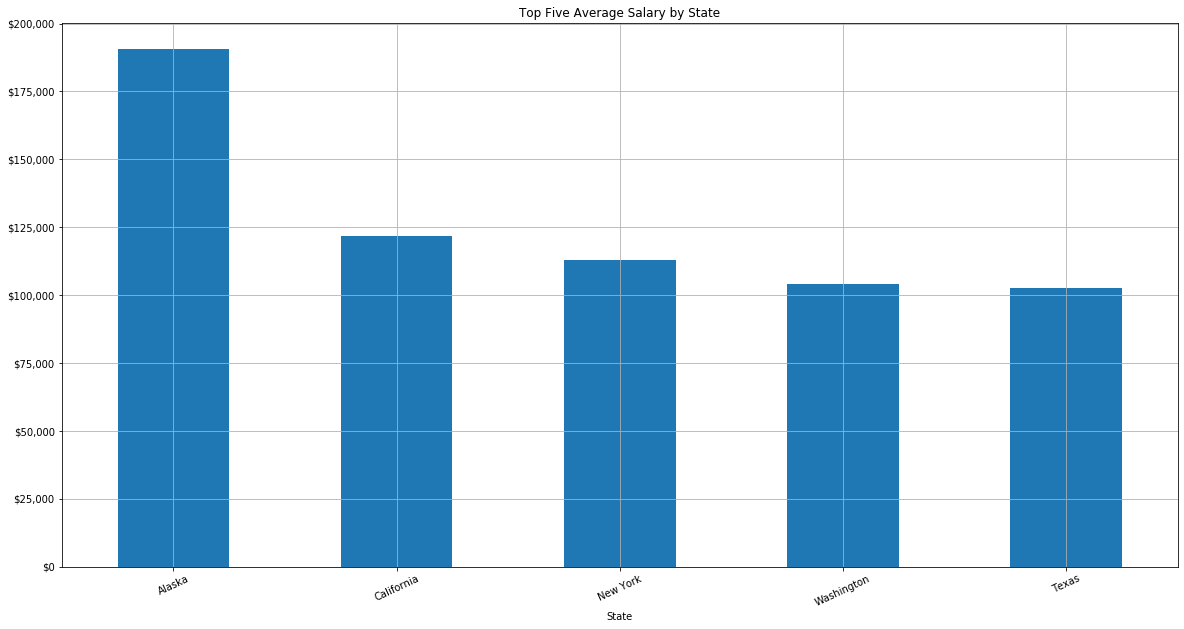

In [17]:
ax3 = top5sal.plot.bar(x = 'State', y = 'Average Salary (USD)', rot=0, figsize=(20,10), grid = True, legend=False, title ="Top Five Average Salary by State")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax3.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

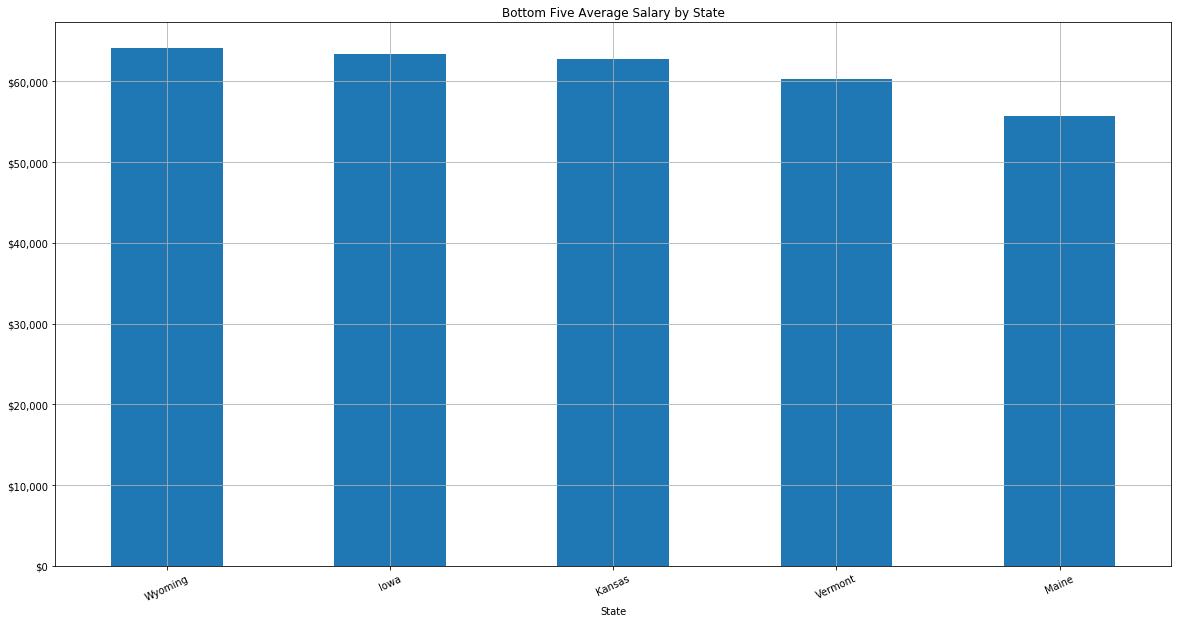

In [18]:
ax4 = bottom5sal.plot.bar(x = 'State', y = 'Average Salary (USD)', rot=0, figsize=(20,10), grid = True, legend=False, title ="Bottom Five Average Salary by State")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax4.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

### Normalizing Dataset Portion 3: Normalizing Years of Experience to Look Uniform

In [19]:
USDnum2['How many years of post-college professional work experience do you have?'] = USDnum2['How many years of post-college professional work experience do you have?'].str.replace(' - ', '-')

exp_salary_avg = pd.pivot_table(USDnum2, values='What is your annual salary?', index ='How many years of post-college professional work experience do you have?',
                    aggfunc=np.average, fill_value=0)

exp_salary_avg.reset_index(inplace = True)

exp_salary_avg.sort_values(by = ['What is your annual salary?'], ascending = False, inplace = True)

exp_salary_avg.columns = ['Experience', 'Average Salary (USD)']

print(exp_salary_avg.head())

         Experience  Average Salary (USD)
3       21-30 years         143229.872659
5  41 years or more         139912.820513
4       31-40 years         134421.083682
1       11-20 years         111682.255390
7        8-10 years          93276.270968


C:\Users\kboostri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

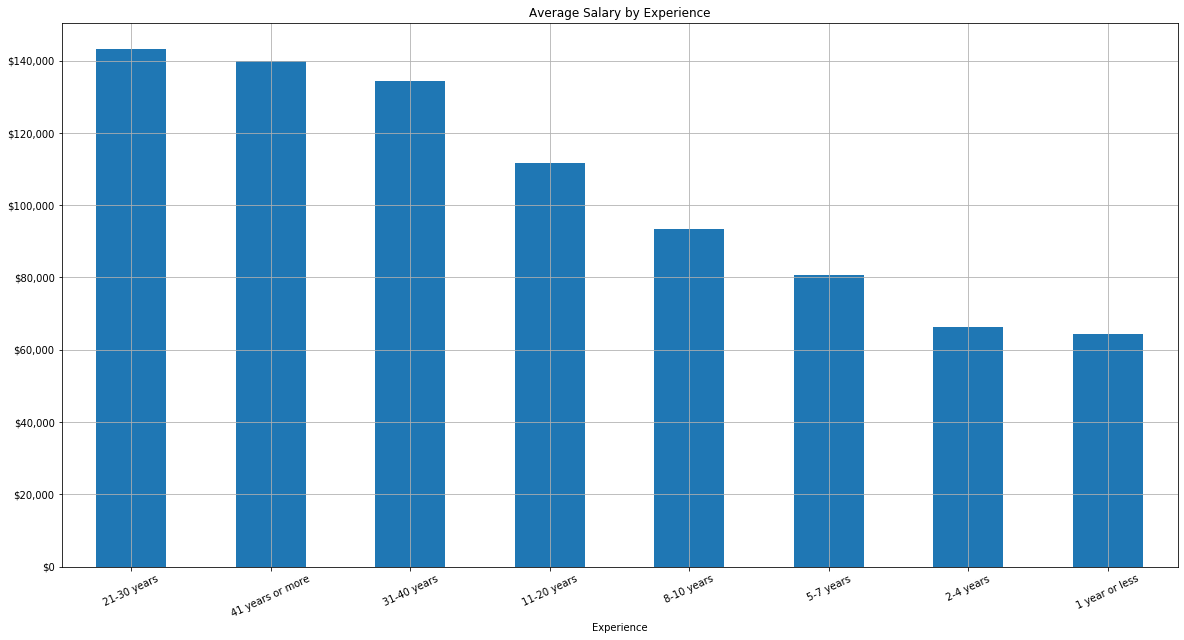

In [20]:
ax4 = exp_salary_avg.plot.bar(x = 'Experience', y = 'Average Salary (USD)', rot=0, figsize=(20,10), grid = True, legend=False, title ="Average Salary by Experience")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax4.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)